<a href="https://colab.research.google.com/github/mprksa/DTx/blob/main/DTxx3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/mprksa/DT.git

Cloning into 'DT'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (337/337), done.
remote: Total 340 (delta 28), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (340/340), 342.22 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Updating files: 100% (280/280), done.


In [20]:
# Path ke direktori gambar
image_dir = '/content/drive/MyDrive/DTx2-main'

In [21]:
# Warna kubus dan labelnya
colors = ['Biru', 'Hijau', 'Kuning', 'Merah', 'Ungu']
labels = {'Biru': 0, 'Hijau': 1, 'Kuning': 2, 'Merah': 3,  'Ungu': 4}

In [22]:
# Menginisialisasi array untuk menyimpan nilai HSV, label, dan path gambar
hsv_values = []
color_labels = []
image_paths = []

# Loop melalui setiap warna dan proses gambarnya
for color in colors:
    color_dir = os.path.join(image_dir, color)
    for img_name in os.listdir(color_dir):
        img_path = os.path.join(color_dir, img_name)
        image = cv2.imread(img_path)

        # Check if the image was loaded successfully
        if image is None:
            print(f"Failed to load image: {img_path}")
            continue  # Skip to the next image

        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Menghitung rata-rata HSV
        avg_hsv = np.mean(hsv_image.reshape(-1, 3), axis=0)

        hsv_values.append(avg_hsv)
        color_labels.append(labels[color])
        image_paths.append(img_path)

hsv_values = np.array(hsv_values)
color_labels = np.array(color_labels)

Failed to load image: /content/drive/MyDrive/DTx2-main/Biru/test
Failed to load image: /content/drive/MyDrive/DTx2-main/Hijau/test
Failed to load image: /content/drive/MyDrive/DTx2-main/Kuning/test
Failed to load image: /content/drive/MyDrive/DTx2-main/Merah/test
Failed to load image: /content/drive/MyDrive/DTx2-main/Ungu/test


In [23]:
# Menghitung jumlah gambar yang dilatih per kelas
num_images_per_class = {color: sum(1 for img_name in os.listdir(os.path.join(image_dir, color))) for color in colors}
print("Jumlah gambar yang dilatih per kelas:")
print(num_images_per_class)

Jumlah gambar yang dilatih per kelas:
{'Biru': 137, 'Hijau': 143, 'Kuning': 138, 'Merah': 169, 'Ungu': 157}


In [24]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(hsv_values, color_labels, image_paths, test_size=0.2, random_state=42)

In [25]:
# Melatih model decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
# Memprediksi label pada data uji
y_pred = model.predict(X_test)

In [12]:
# Memprediksi label pada data uji
y_pred = model.predict(X_test)

In [27]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy * 100:.2f}%')

Akurasi model: 97.97%


In [28]:
# Menampilkan Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=colors))

Classification Report:
              precision    recall  f1-score   support

        Biru       1.00      1.00      1.00        33
       Hijau       1.00      1.00      1.00        26
      Kuning       0.94      0.97      0.96        33
       Merah       0.97      0.94      0.95        31
        Ungu       1.00      1.00      1.00        25

    accuracy                           0.98       148
   macro avg       0.98      0.98      0.98       148
weighted avg       0.98      0.98      0.98       148



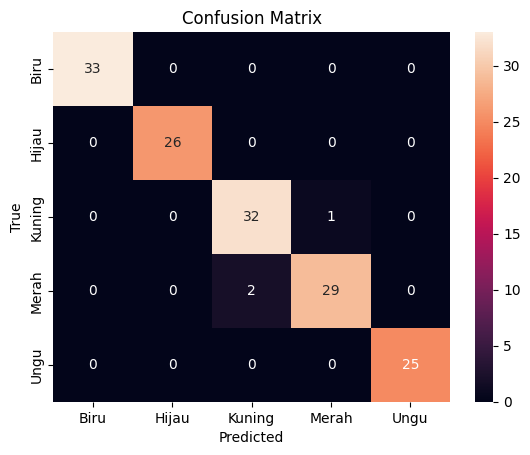

In [29]:
# Menampilkan Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=colors, yticklabels=colors)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

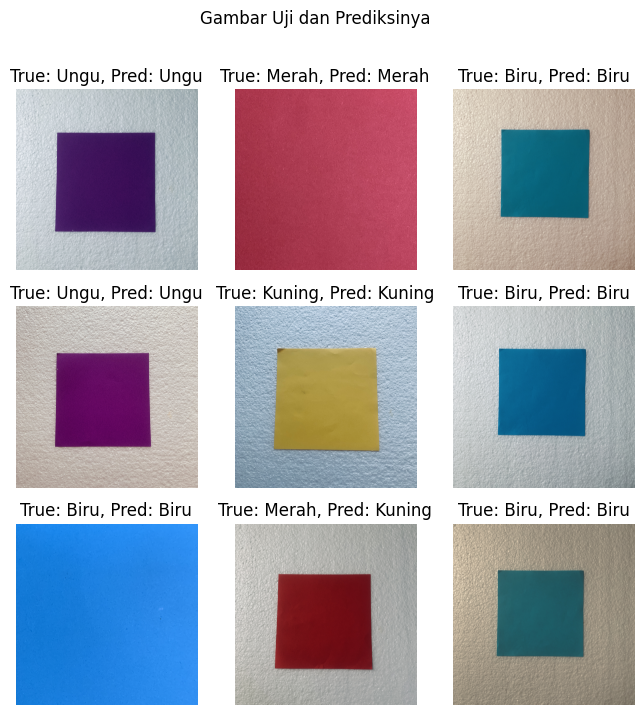

In [31]:
# Menampilkan gambar uji beserta prediksinya
plt.figure(figsize=(8, 8))
for i in range(9):  # Menampilkan 9 gambar acak dari data uji
    index = random.randint(0, len(paths_test) - 1)
    img = cv2.imread(paths_test[index])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    true_label = colors[y_test[index]]
    pred_label = colors[y_pred[index]]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
plt.suptitle("Gambar Uji dan Prediksinya")
plt.show()

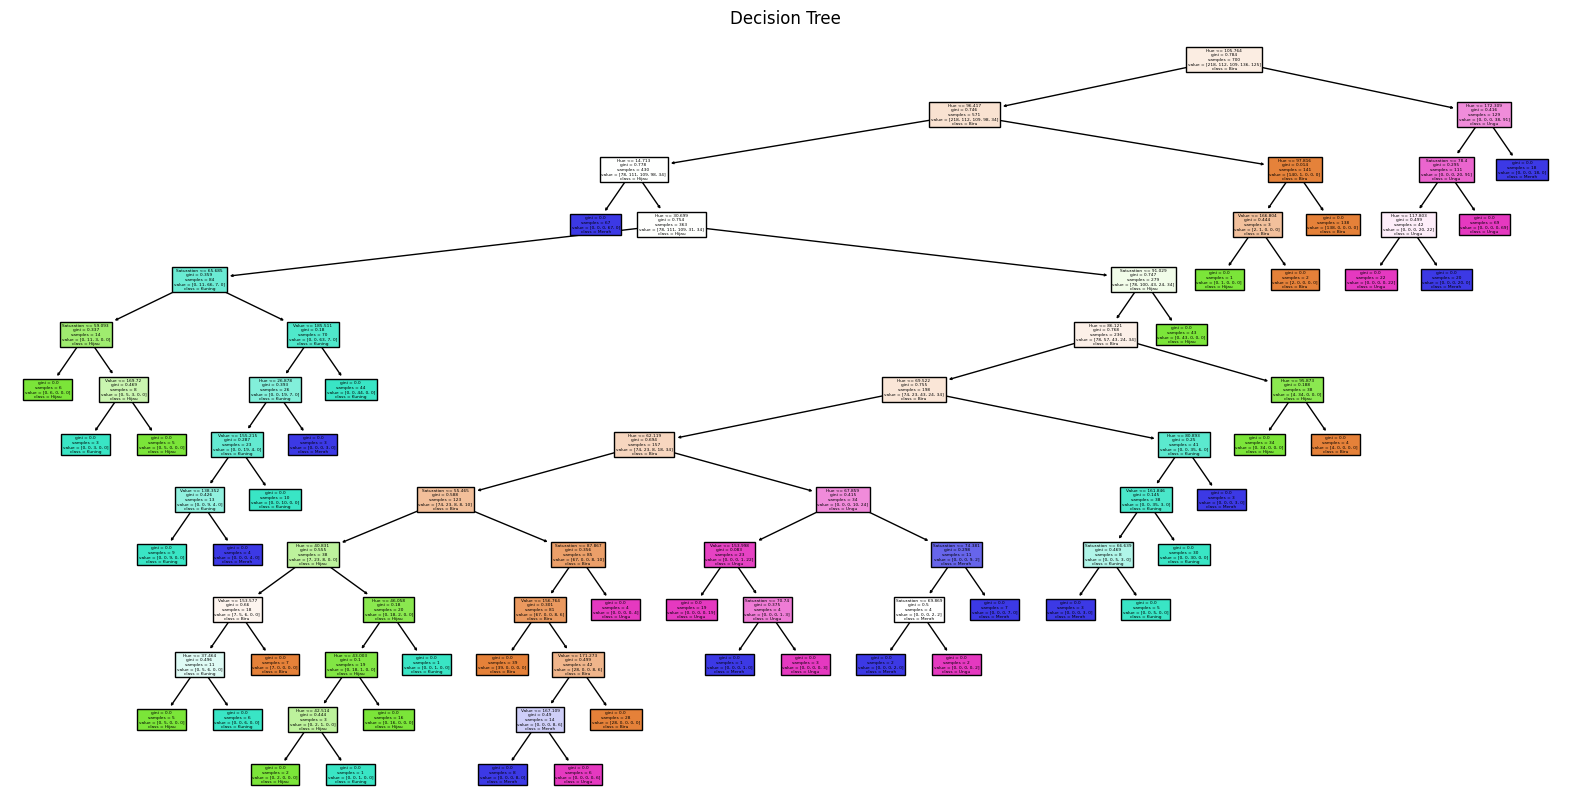

In [16]:
# Menampilkan Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=['Hue', 'Saturation', 'Value'], class_names=colors, filled=True)
plt.title('Decision Tree')
plt.show()

In [18]:
import pickle

# Melatih model decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Simpan model ke dalam file pickle
with open('DTxt.pkl', 'wb') as f:
    pickle.dump(model, f)

# **With Augmentation, Min, and Max HSV Value**

In [16]:
# Augmentasi data menggunakan ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [17]:
# Fungsi untuk memuat gambar dan mengubahnya ke HSV
def load_and_preprocess_image(img_path):
    image = cv2.imread(img_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv_image

In [ ]:
# Loop untuk augmentasi data dan menghitung nilai HSV
augmented_hsv_values = []
augmented_labels = []

for color in colors:
    color_dir = os.path.join(image_dir, color)
    for img_name in os.listdir(color_dir):
        img_path = os.path.join(color_dir, img_name)
        image = cv2.imread(img_path)
        image = np.expand_dims(image, 0)

        i = 0
        for batch in datagen.flow(image, batch_size=1):
            hsv_image = cv2.cvtColor(batch[0], cv2.COLOR_BGR2HSV)
            avg_hsv = np.mean(hsv_image.reshape(-1, 3), axis=0)
            augmented_hsv_values.append(avg_hsv)
            augmented_labels.append(labels[color])

            i += 1
            if i >= 10:  # Augmentasi setiap gambar 5 kali
                break

augmented_hsv_values = np.array(augmented_hsv_values)
augmented_labels = np.array(augmented_labels)

In [ ]:
# Gabungkan data asli dan data augmentasi
all_hsv_values = np.concatenate((hsv_values, augmented_hsv_values), axis=0)
all_labels = np.concatenate((color_labels, augmented_labels), axis=0)

In [ ]:
# Statistik HSV untuk setiap kelas
min_max_values = {
    'biru': {'min': np.array([31.164612, 38.924139, 64.162440]), 'max': np.array([49.730265, 59.502403, 115.688963])},
    'kuning': {'min': np.array([45.565988, 35.625047, 53.983743]), 'max': np.array([102.270490, 97.617601, 100.135815])},
    'merah': {'min': np.array([17.738440, 38.812944, 91.836591]), 'max': np.array([26.161265, 67.520021, 110.844266])},
    'putih': {'min': np.array([22.010363, 12.089440, 62.943604]), 'max': np.array([41.668930, 73.859910, 103.806988])},
    'ungu': {'min': np.array([45.446565, 23.684833, 88.686395]), 'max': np.array([75.072096, 34.092053, 109.672403])},
}

In [ ]:
# Membagi data yang telah diaugmentasi menjadi data latih dan data uji
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(all_hsv_values, all_labels, test_size=0.2, random_state=65)

In [ ]:
# Melatih model decision tree dengan data yang telah diaugmentasi
model_aug = DecisionTreeClassifier()
model_aug.fit(X_train_aug, y_train_aug)

DecisionTreeClassifier()

In [ ]:
# Memprediksi label pada data uji
y_pred_aug = model_aug.predict(X_test_aug)

In [ ]:
# Menghitung akurasi
accuracy_aug = accuracy_score(y_test_aug, y_pred_aug)
print(f'Akurasi model dengan augmentasi: {accuracy_aug * 100:.2f}%')

Akurasi model dengan augmentasi: 97.27%


In [ ]:
# Membuat classification report
report_aug = classification_report(y_test_aug, y_pred_aug, target_names=colors, output_dict=True)

In [ ]:
# Mengubah classification report ke dalam bentuk DataFrame untuk visualisasi
report_aug_df = pd.DataFrame(report_aug).transpose()

In [ ]:
# Menampilkan Classification Report
print("Classification Report:")
# Assuming 'colors' is defined somewhere and has the correct class names
print(classification_report(y_test_aug, y_pred_aug, target_names=colors)) # Slice colors list to match number of classes

Classification Report:
              precision    recall  f1-score   support

        biru       0.95      1.00      0.98        21
      kuning       1.00      0.91      0.95        22
       merah       0.96      1.00      0.98        23
       putih       0.96      1.00      0.98        22
        ungu       1.00      0.95      0.98        22

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110



In [ ]:
# Membuat confusion matrix
cm_aug = confusion_matrix(y_test_aug, y_pred_aug)

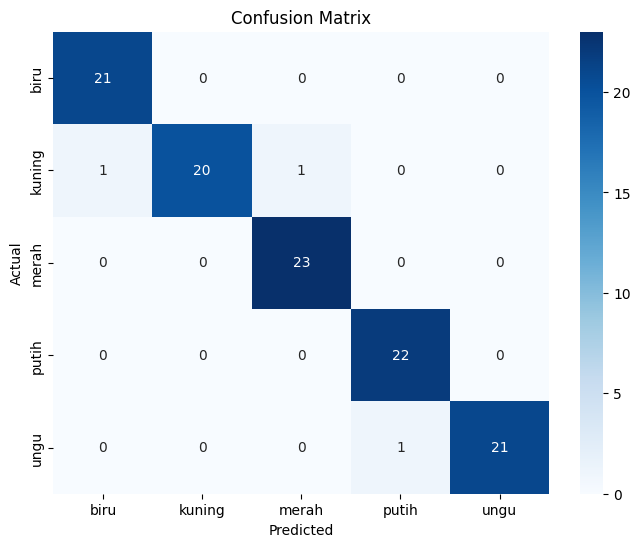

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_aug, annot=True, fmt="d", cmap="Blues", xticklabels=colors, yticklabels=colors)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

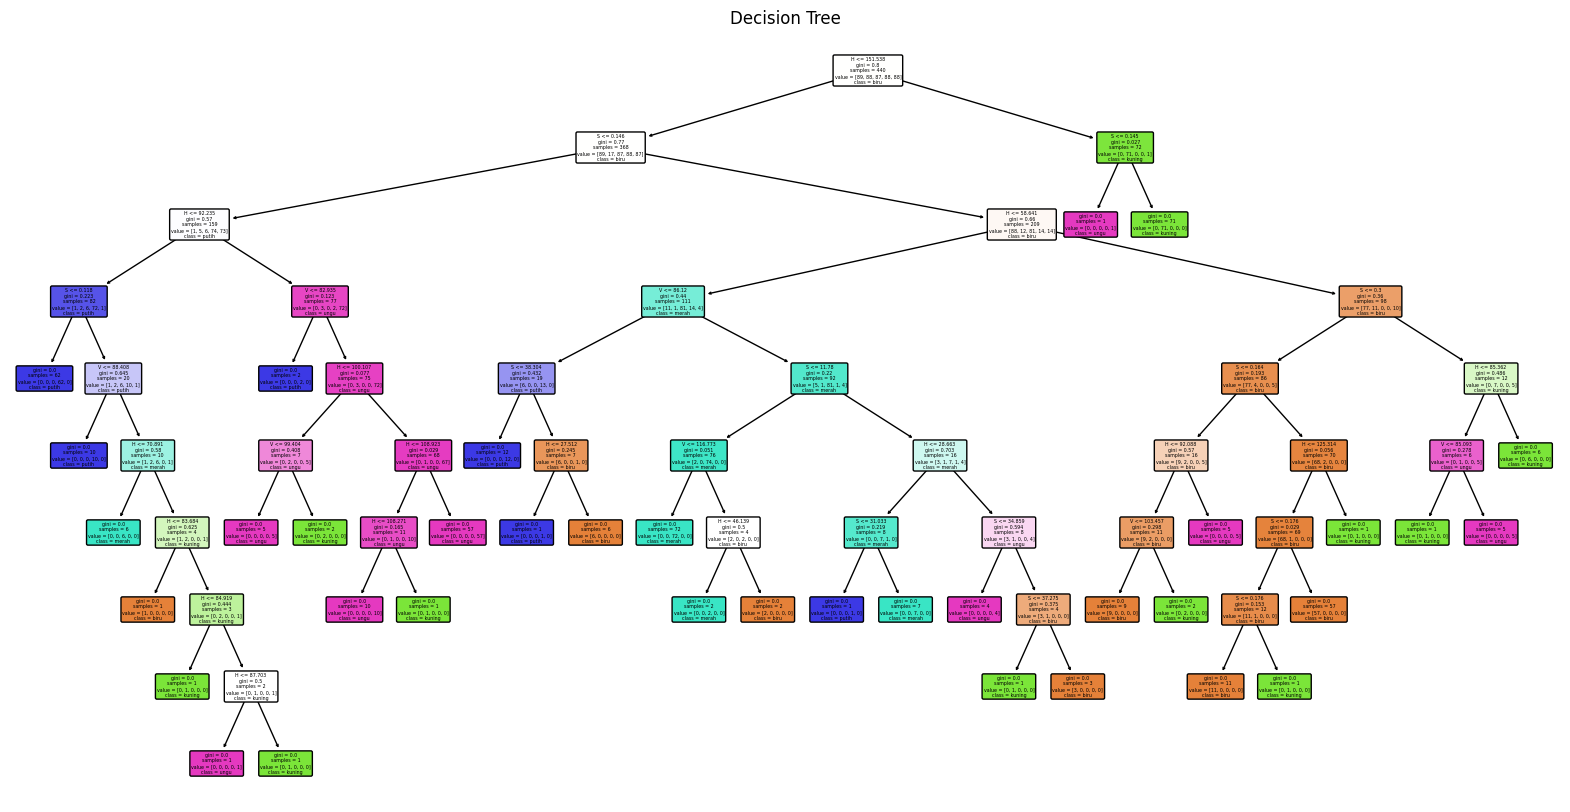

In [ ]:
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model_aug, feature_names=['H', 'S', 'V'], class_names=colors, filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()